# Binomial Distribution

Imagine that you are running an experiment where you are flipping a coin 100 times

In [1]:
import random
coin_heads, coin_tails, times_flipped = 0, 0, 0
timesflipped = 0  # <-- here's what I added.
outcome = ""
while timesflipped < 100:
	coin_flips = random.randrange( 2 )
	if coin_flips == 0:
		coin_heads += 1
		outcome=outcome+"H"
	else:
		coin_tails += 1
		outcome=outcome+"T"
	timesflipped += 1
	
print(outcome)
print("Out of 100 flips, " + str(coin_heads) + " were heads and " + str(coin_tails) + " were tails.")

HTHTTTHHTHTHTHTHHTTHHHHTTTHHHHTHHTHTTHHHTHHTTHHTHHHHHHTTTHHTHHHTHHTTTTHHTHHHHHHHTHHHTTTHTTTTTTTHTHHT
Out of 100 flips, 56 were heads and 44 were tails.


* What is the probability that you would get Heads all 100 times?

In [2]:
(1/2)**timesflipped

7.888609052210118e-31

## That's very unlikely!
* What is the probability of getting half heads and half tails?

This becomes harder: imagine we simplify this down to three flips
* Possible outcomes: 
(HHH),(HHT), (HTH), (HTT), (THH), (THT), (TTH), (TTT)
* The probability of getting exactly 1 heads is: 2/8=0.25

We can think of this in a probability tree:

![prob tree](HHTdecisiontree2.png)

* The probability of Point E is the joint probability of getting outcome HHH
* Points H, M, and N are the outcomes where we get only one H
* Because each outcome from a coin flip is an independent event, we can calculate the joint probability of any outcome as the product of the probabilities: 
$$p(\text{point } H)=p(H)p(T)p(T)=p(H)*p(T)^2 = (1/2)^3 =1/8=0.125$$
* We can find the probability of H, M, or N happening (aka the probability of at least one H) as
$$ p(\text{point H, M, or N}) =  p(\text{point } H) + p(\text{point }  M) + p(\text{point }  N) = 3*(p(H)*p(T)^2) = 3*(1/2)(1/2)^2 =0.375 $$

### Combinations:
Now, we can easily create the probability of choosing exactly one heads by using the mathematical concept of a **combination**.

A combination is the number of ways that we can select $k$ things out of $N$ options, with replacement. Mathematically:

$$\binom{N}{k}=\frac{N!}{(k!)(N-k)!}$$

Where $N$ is the number of times we perform the experiment and $k$ is the number of "successes" (outcomes that we are looking for)

* The number of ways that we can get one Heads $(k=1)$ out of 3 coin flips $(N=3)$ is:

$$\binom{3}{2}=\frac{3!}{(2!)(3-2)!}=\frac{3*2*1}{(2*1)(1)}=3$$

In [11]:
import scipy.special
scipy.special.comb(3,2)


3.0

## Binomial distribution

A random variable is considered distributed Binomally if there are two independent outcomes (success or failure) over $N$ trials where the probabilities of success ($p$) and failure ($q$) are known and constant. 

The notation is 
$$ Y \sim B(N,p)$$

The probability of $k$ successes out of the $N$ independent trials is 
$$P(k,N) = \binom{N}{k} p^kq^{(N-k)}$$

$\binom{N}{k}$ is known as the **binomial coefficient** 

For our three coin flips:

In [12]:
bcoef = scipy.special.comb(3,1) # calculates the binomial coefficient
print("Binomial Coefficient: "+ str(bcoef))
p = 0.5 #probability of success
q = 0.5 #probability of failure
N = 3 # Number of trials
k = 1 # Desired number of successes

print("Prob(Exactly 1 Head in 3 Flips)= " + str(bcoef*p**k*q**(N-k)))

Binomial Coefficient: 3.0
Prob(Exactly 1 Head in 3 Flips)= 0.375


### Let's bring it back to our first example!
We want to find the probability of getting 50 heads out of 100 flips:

In [6]:
import math
p = 0.5
q = 0.5
N = 100
k = 50

bcoef = scipy.special.comb(N,k)
print("Binomial Coefficient: "+ str(bcoef))

print("Prob(Exactly "+ str(k) +" Heads in " + str(N) + " Flips)= " + str(round(bcoef*p**k*q**(N-k),4)))

Binomial Coefficient: 1.0089134454556415e+29
Prob(Exactly 50 Heads in 100 Flips)= 0.0796


### Exercise: Show why calculating this using the formula would be very challenging.

## The Expected Value and Std Deviation of the Binomial Distribution

The expected value of a variable with Binomial Distribution is:
$$\mu = np$$ 
and the variance/standard deviation is:
$$\sigma^2 =npq$$
$$\sigma=\sqrt{npq}$$

For our example:
* $\mu = (100)(1/2) = 50$, so you would expect to get 50 heads on average if you flip a coin 100 times
* $\sigma^2 = (100)(0.5)(0.5)=25$
* $\sigma = \sqrt{25}=5$, so you would expect 99.7% of repeated experiments to have between $50-3*5=35$ and $50+3*5=65$ heads out of 100 flips

In [17]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

n, p = 100, 0.5
mean, var=binom.stats(n, p, moments='mv')
print("The mean is: " + str(mean) )
std = math.sqrt(var)
print("The standard deviation is: " + str(std))

TypeError: type numpy.ndarray doesn't define __round__ method

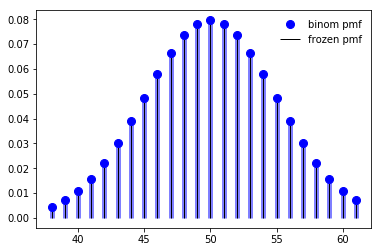

In [8]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

n, p = 100, 0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)

plt.show()

## Cumulative probabilities:

In [9]:
k=45

print("p(Y<=" + str(k) + ")= " + str(round(binom.cdf(k, n, p, loc=0),4)))
print("p(Y>" + str(k) + ")= " + str(round(1-binom.cdf(k, n, p, loc=0),4)))

a = 45
b = 60
print("p(" + str(a) + "<=Y<=" + str(b) + ")= " + str(round(binom.cdf(b, n, p, loc=0)-binom.cdf(a-1, n, p, loc=0),4)))



p(Y<=45)= 0.1841
p(Y>45)= 0.8159
p(45<=Y<=60)= 0.8468


# Exercises:
1. Find the probability of selecting 10 females out of a pool of 100 candidates. Assume that the probability of selecting a female is 50%.

2. Find $prob(Y\leq 9)$ if $Y \sim B(30,0.25)$
3. Find $prob(Y>10)$ if $Y \sim B(30,0.25)$
4. Find $prob(7\leq Y \leq 10)$ if $Y \sim B(30,0.25)$